In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [2]:
data=pd.read_csv(r'C:\Users\USER\Downloads\data sets\hr_data.csv')

In [3]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.shape

(14999, 10)

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [9]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [10]:
data=data.rename(columns={'sales':'Department'})

In [11]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
data["number_project"].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [13]:
data["number_project"].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

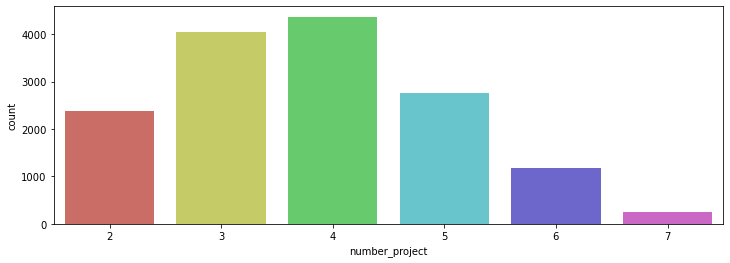

In [14]:
plt.figure(figsize=(12,4))
sns.countplot("number_project",data=data,palette='hls')
plt.show()

In [15]:
data["satisfaction_level"].value_counts()

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64

In [16]:
data["time_spend_company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [17]:
data["time_spend_company"].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

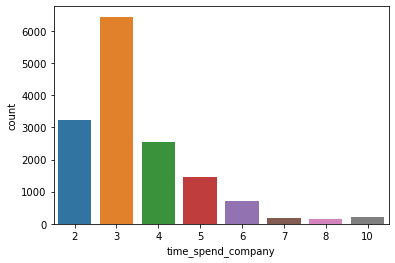

In [18]:
#time spending employees in hours
sns.countplot("time_spend_company",data=data)
plt.show()

In [19]:
data["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [20]:
data["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

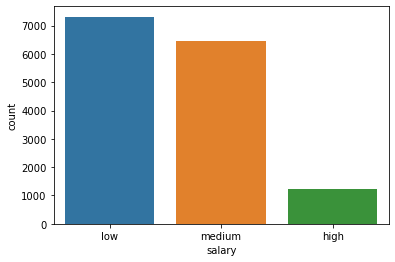

In [21]:
sns.countplot("salary",data=data)
plt.show()

In [22]:
data["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [23]:
data["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

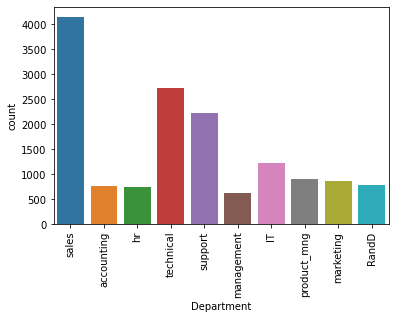

In [24]:
sns.countplot("Department",data=data)
plt.xticks(rotation=90)
plt.show()

In [25]:
data["Work_accident"].unique()

array([0, 1], dtype=int64)

In [26]:
data["Work_accident"].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

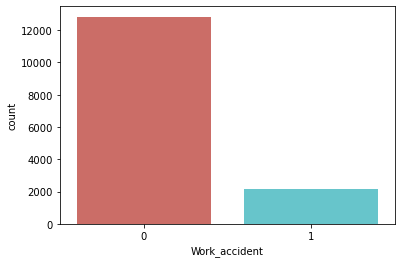

In [27]:
sns.countplot("Work_accident",data=data,palette='hls')
plt.show()

In [28]:
data["left"].unique()

array([1, 0], dtype=int64)

In [29]:
data["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

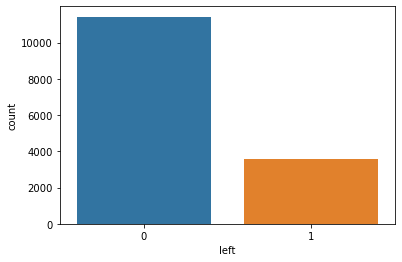

In [30]:
sns.countplot("left",data=data)
plt.show()

In [31]:
data["promotion_last_5years"].unique()

array([0, 1], dtype=int64)

In [32]:
data["promotion_last_5years"].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

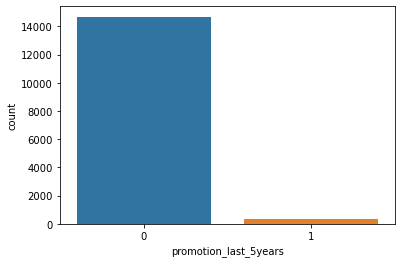

In [33]:
sns.countplot("promotion_last_5years",data=data)
plt.show()

In [34]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

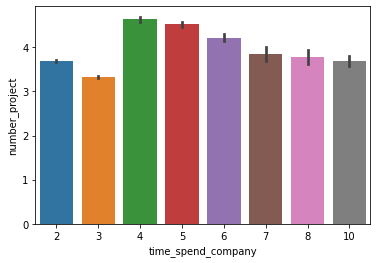

In [35]:
sns.barplot(data["time_spend_company"],data["number_project"])
plt.show()

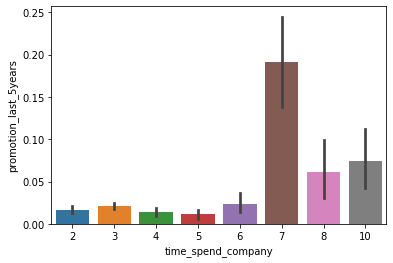

In [36]:
sns.barplot(data["time_spend_company"],data["promotion_last_5years"])
plt.show()

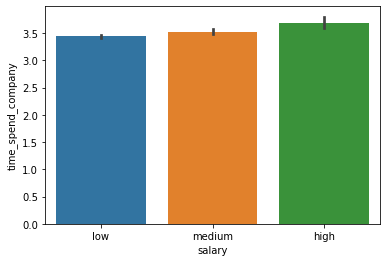

In [37]:
sns.barplot(data["salary"],data["time_spend_company"])
plt.show()

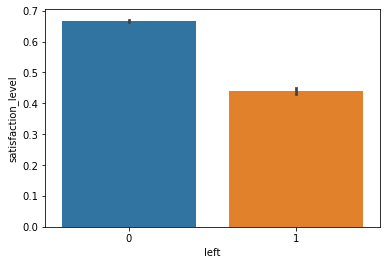

In [38]:
sns.barplot(data["left"],data["satisfaction_level"])
plt.show()

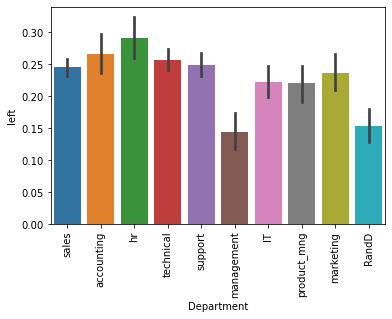

In [39]:
sns.barplot(data["Department"],data["left"])
plt.xticks(rotation=90)
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['salary']=le.fit_transform(data['salary'])
data['Department']=le.fit_transform(data['Department'])

In [41]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


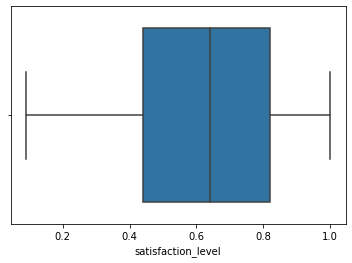

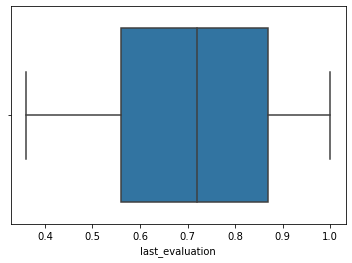

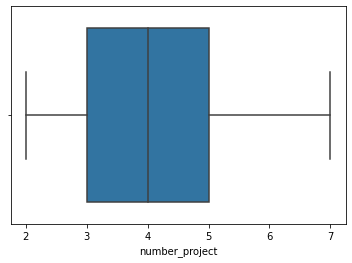

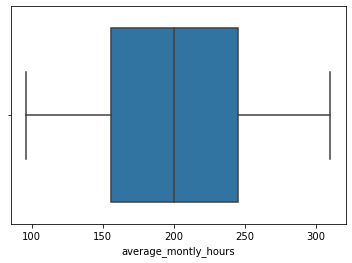

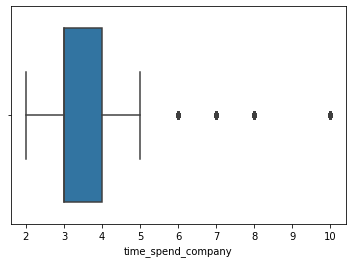

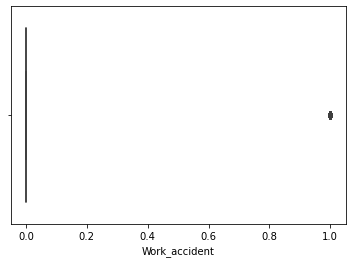

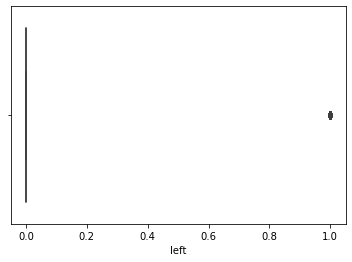

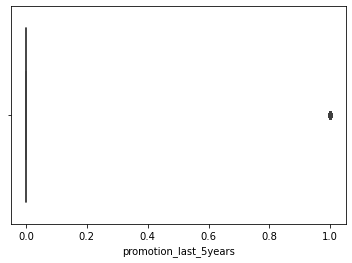

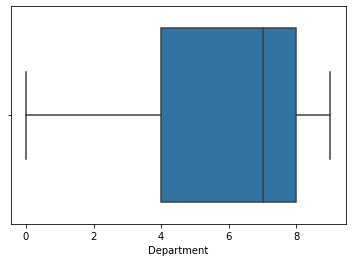

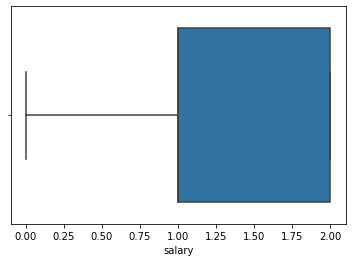

In [42]:
for i in data:
    sns.boxplot(data[i])
    plt.show()

In [43]:
cols=['satisfaction_level','last_evaluation','number_project','average_montly_hours','Department','salary']
X=data[cols]
Y=data["left"]

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [45]:
#Logistic Regression Model

In [46]:
Lregression=LogisticRegression()
Lregression.fit(X_train,Y_train)

LogisticRegression()

In [47]:
prediction_test=Lregression.predict(X_test)
prediction_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [48]:
YtrainingaccLregression= Lregression.predict(X_train)

In [50]:
accuracy=accuracy_score(Y_test,prediction_test)

In [51]:
print("Testing Accuracy Score = ",metrics.accuracy_score(prediction_test,Y_test))

Testing Accuracy Score =  0.7788888888888889


In [52]:
print("Training Accuracy Score = ",metrics.accuracy_score(YtrainingaccLregression,Y_train))

Training Accuracy Score =  0.7780741022954567


In [53]:
print(classification_report(Y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3462
           1       0.54      0.26      0.35      1038

    accuracy                           0.78      4500
   macro avg       0.68      0.60      0.61      4500
weighted avg       0.75      0.78      0.75      4500



Text(0.5, 1.0, 'Logistic Regression')

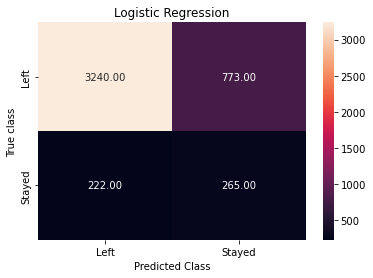

In [54]:
y=Lregression.predict(X_test)
Lregression_confusionmat=metrics.confusion_matrix(y,Y_test)
sns.heatmap(Lregression_confusionmat,annot=True,fmt='.2f',xticklabels=['Left','Stayed'],yticklabels=['Left','Stayed'])
plt.ylabel('True class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression')


In [55]:
# Random Forest Model 

In [56]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
prediction1=RFC.predict(X_test)
prediction1

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
accuracy=accuracy_score(Y_test,prediction1)
accuracy

0.9762222222222222

In [58]:
print(classification_report(Y_test,prediction1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3462
           1       0.95      0.95      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



Text(0.5, 1.0, 'Random Forest')

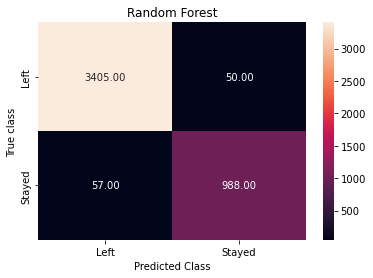

In [59]:
X=RFC.predict(X_test)
RFC_confusionmat=metrics.confusion_matrix(X,Y_test)
sns.heatmap(RFC_confusionmat,annot=True,fmt='.2f',xticklabels=['Left','Stayed'],yticklabels=['Left','Stayed'])
plt.ylabel('True class')
plt.xlabel('Predicted Class')
plt.title('Random Forest')

In [ ]:
#SVM Model

In [60]:
SVCModel=SVC(kernel='rbf',random_state=1)
SVCModel.fit(X_train,Y_train)
prediction3=SVCModel.predict(X_test)

In [61]:
accuracy=accuracy_score(prediction3,Y_test)
accuracy

0.7904444444444444

In [62]:
# GaussianNB Model

In [63]:
Gmodel=GaussianNB()
Gmodel.fit(X_train,Y_train)
prediction4=Gmodel.predict(X_test)

In [64]:
accuracy=accuracy_score(prediction4,Y_test)
accuracy

0.8084444444444444

In [65]:
# KNN(kth nearest neighbour) Classifier

In [66]:
knnModel=KNeighborsClassifier(n_neighbors=17)
knnModel.fit(X_train,Y_train)
predictionknn=knnModel.predict(X_test)

In [67]:
accuracyknn=accuracy_score(predictionknn,Y_test)
accuracyknn

0.8964444444444445

In [68]:
#XGBoost 

In [69]:
XGBModel = XGBClassifier()
XGBModel.fit(X_train,Y_train)
predXGB=XGBModel.predict(X_test)

In [70]:
accxgb=accuracy_score(predXGB,Y_test)
accxgb

0.9673333333333334

In [72]:
#Linear Discriminant Analysis

In [73]:
LDAModel = LinearDiscriminantAnalysis()
LDAModel.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [74]:
predLDA = LDAModel.predict(X_test)

In [75]:
accLDA=accuracy_score(predLDA,Y_test)
accLDA

0.7697777777777778

In [76]:
#Ada Boost

In [77]:
ABModel = AdaBoostClassifier(n_estimators = 1000,learning_rate = 0.1,random_state = 0)
ABModel.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=0)

In [78]:
predAB=ABModel.predict(X_test)

In [79]:
accAB=accuracy_score(predAB,Y_test)

In [80]:
accAB

0.934

In [81]:
#Bagging Classifier

In [82]:
BCModel= BaggingClassifier(base_estimator = SVC(),n_estimators=100,random_state = 0)
BCModel.fit(X_train,Y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=0)

In [83]:
predBC=BCModel.predict(X_test)

In [84]:
accBC=accuracy_score(predBC,Y_test)
accBC

0.7904444444444444

In [85]:
#Extra Trees Classifier

In [86]:
ETCModel=ExtraTreesClassifier(n_estimators = 1000,random_state = 0)
ETCModel.fit(X_train,Y_train)

ExtraTreesClassifier(n_estimators=1000, random_state=0)

In [87]:
predETC=ETCModel.predict(X_test)

In [88]:
accETC=accuracy_score(predETC,Y_test)
accETC

0.9726666666666667

In [ ]:
#models that gives more accuracies are Random Forest and Extra Trees Classifier